# Empty project notebook

In [10]:
# Import python packages
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
import pandas as pd
import os

file_path = "data/EAT CASE INTERVIEW - DATA.csv"

print("Checking path:", os.path.abspath(file_path))

try:
    df = pd.read_csv(file_path)
    print(df.head())
except FileNotFoundError:
    print(f"❌ File not found: {file_path}")

Checking path: /Users/drtclements/Desktop/Coding_Work/Sysco/src/data/EAT CASE INTERVIEW - DATA.csv
      city cuisine product_type    week  customer_count  cases      revenue   \
0  HOUSTON   Asian     Non Food  202027             135  1,700   $64,848.40    
1  HOUSTON   Asian     Non Food  202028             152  1,706   $67,882.92    
2  HOUSTON   Asian     Non Food  202029             142  1,707   $67,106.98    
3  HOUSTON   Asian     Non Food  202030             155  1,830   $79,953.54    
4  HOUSTON   Asian     Non Food  202031             147  1,841   $65,375.47    

          cost   
0   $40,577.02   
1   $45,765.28   
2   $46,050.63   
3   $46,981.28   
4   $42,107.22   


In [12]:
print(df.info)
print(df.shape)


<bound method DataFrame.info of          city              cuisine product_type    week  customer_count  \
0     HOUSTON                Asian     Non Food  202027             135   
1     HOUSTON                Asian     Non Food  202028             152   
2     HOUSTON                Asian     Non Food  202029             142   
3     HOUSTON                Asian     Non Food  202030             155   
4     HOUSTON                Asian     Non Food  202031             147   
...       ...                  ...          ...     ...             ...   
4507  SPOKANE  Mainstream American     Proteins  202212             188   
4508  SPOKANE  Mainstream American     Proteins  202213             191   
4509  SPOKANE  Mainstream American     Proteins  202214             187   
4510  SPOKANE  Mainstream American     Proteins  202215             185   
4511  SPOKANE  Mainstream American     Proteins  202216             185   

      cases       revenue           cost   
0     1,700    $64,848.

In [13]:
#Column/feature names

print(df.columns.tolist())
df.columns = df.columns.str.strip()

['city', 'cuisine', 'product_type', 'week', 'customer_count', 'cases', ' revenue ', ' cost ']


In [14]:
#Weeks formatted
pd.to_datetime(df['week'].astype(str) + '-1', format='%G%V-%u')
df['revenue'] = df['revenue'].astype(str).str.replace(r'[^0-9.]', '', regex=True).astype(float)
df['cost'] = df['cost'].astype(str).str.replace(r'[^0-9.]', '', regex=True).astype(float)

In [15]:
print(df.head)

<bound method NDFrame.head of          city              cuisine product_type    week  customer_count  \
0     HOUSTON                Asian     Non Food  202027             135   
1     HOUSTON                Asian     Non Food  202028             152   
2     HOUSTON                Asian     Non Food  202029             142   
3     HOUSTON                Asian     Non Food  202030             155   
4     HOUSTON                Asian     Non Food  202031             147   
...       ...                  ...          ...     ...             ...   
4507  SPOKANE  Mainstream American     Proteins  202212             188   
4508  SPOKANE  Mainstream American     Proteins  202213             191   
4509  SPOKANE  Mainstream American     Proteins  202214             187   
4510  SPOKANE  Mainstream American     Proteins  202215             185   
4511  SPOKANE  Mainstream American     Proteins  202216             185   

      cases    revenue       cost  
0     1,700   64848.40   40577.02

In [16]:
df['cases'] = df['cases'].astype(str).str.replace(',', '').astype(float)

In [17]:
df.head

<bound method NDFrame.head of          city              cuisine product_type    week  customer_count  \
0     HOUSTON                Asian     Non Food  202027             135   
1     HOUSTON                Asian     Non Food  202028             152   
2     HOUSTON                Asian     Non Food  202029             142   
3     HOUSTON                Asian     Non Food  202030             155   
4     HOUSTON                Asian     Non Food  202031             147   
...       ...                  ...          ...     ...             ...   
4507  SPOKANE  Mainstream American     Proteins  202212             188   
4508  SPOKANE  Mainstream American     Proteins  202213             191   
4509  SPOKANE  Mainstream American     Proteins  202214             187   
4510  SPOKANE  Mainstream American     Proteins  202215             185   
4511  SPOKANE  Mainstream American     Proteins  202216             185   

       cases    revenue       cost  
0     1700.0   64848.40   40577.

In [18]:
df['cases'] = df['cases'].astype(int)

In [19]:
print(df.head)

<bound method NDFrame.head of          city              cuisine product_type    week  customer_count  \
0     HOUSTON                Asian     Non Food  202027             135   
1     HOUSTON                Asian     Non Food  202028             152   
2     HOUSTON                Asian     Non Food  202029             142   
3     HOUSTON                Asian     Non Food  202030             155   
4     HOUSTON                Asian     Non Food  202031             147   
...       ...                  ...          ...     ...             ...   
4507  SPOKANE  Mainstream American     Proteins  202212             188   
4508  SPOKANE  Mainstream American     Proteins  202213             191   
4509  SPOKANE  Mainstream American     Proteins  202214             187   
4510  SPOKANE  Mainstream American     Proteins  202215             185   
4511  SPOKANE  Mainstream American     Proteins  202216             185   

      cases    revenue       cost  
0      1700   64848.40   40577.02

In [20]:
df.describe()

,week,customer_count,cases,revenue,cost
count,4512.000000,4512.000000,4512.000000,4.512000e+03,4.512000e+03
mean,202116.393617,175.905807,5422.957004,2.715859e+05,2.241879e+05
std,57.275071,109.812834,6089.161213,3.192892e+05,2.774220e+05
min,202027.000000,20.000000,177.000000,6.335850e+03,4.221900e+03
25%,202050.000000,93.000000,1396.500000,5.962061e+04,4.484819e+04
50%,202121.500000,157.000000,3265.500000,1.361708e+05,1.082567e+05
75%,202145.000000,239.000000,7220.000000,3.427414e+05,2.695068e+05
max,202216.000000,536.000000,36498.000000,1.588505e+06,1.363835e+06


In [21]:
print(df.dtypes)

city               object
cuisine            object
product_type       object
week                int64
customer_count      int64
cases               int64
revenue           float64
cost              float64
dtype: object


In [22]:
#Examining number of rows 

print("City value counts:")
print(df['city'].value_counts())
print("\nCuisine value counts:")
print(df['cuisine'].value_counts())
print("\nProduct type value counts:")
print(df['product_type'].value_counts())



city_counts = df['city'].value_counts()
cuisine_counts = df['cuisine'].value_counts()
product_type_counts = df['product_type'].value_counts()

City value counts:
city
HOUSTON          1504
SAN FRANCISCO    1504
SPOKANE          1504
Name: count, dtype: int64

Cuisine value counts:
cuisine
Asian                  1128
Italian                1128
Latin                  1128
Mainstream American    1128
Name: count, dtype: int64

Product type value counts:
product_type
Non Food      1128
Other Food    1128
Produce       1128
Proteins      1128
Name: count, dtype: int64


In [23]:
#Turning 'week' into dateime/time series data

df['week'] = pd.to_datetime(df['week'].astype(str) + '-1', format='%G%V-%u')



In [24]:
#Creating column of 'seasons' to examine general seasonality 

df['month'] = df['week'].dt.month

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

df['season'] = df['month'].apply(get_season)

In [25]:
df.head

<bound method NDFrame.head of          city              cuisine product_type       week  customer_count  \
0     HOUSTON                Asian     Non Food 2020-06-29             135   
1     HOUSTON                Asian     Non Food 2020-07-06             152   
2     HOUSTON                Asian     Non Food 2020-07-13             142   
3     HOUSTON                Asian     Non Food 2020-07-20             155   
4     HOUSTON                Asian     Non Food 2020-07-27             147   
...       ...                  ...          ...        ...             ...   
4507  SPOKANE  Mainstream American     Proteins 2022-03-21             188   
4508  SPOKANE  Mainstream American     Proteins 2022-03-28             191   
4509  SPOKANE  Mainstream American     Proteins 2022-04-04             187   
4510  SPOKANE  Mainstream American     Proteins 2022-04-11             185   
4511  SPOKANE  Mainstream American     Proteins 2022-04-18             185   

      cases    revenue       cost

In [26]:
#Checking for blanks/NaNs
print(df.isna().sum())

blank_counts = df.select_dtypes(include='object').apply(lambda col: col.str.strip().eq('').sum())
print(blank_counts)

city              0
cuisine           0
product_type      0
week              0
customer_count    0
cases             0
revenue           0
cost              0
month             0
season            0
dtype: int64
city            0
cuisine         0
product_type    0
season          0
dtype: int64


Splitting into Cat and Num

In [27]:
# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
datetime_cols = df.select_dtypes(include=['datetime64[ns]']).columns

print("Numerical columns:", num_cols)
print("Categorical columns:", cat_cols)
print("DateTime", datetime_cols)

Numerical columns: ['customer_count', 'cases', 'revenue', 'cost']
Categorical columns: ['city', 'cuisine', 'product_type', 'season']
DateTime Index(['week'], dtype='object')


In [28]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
customer_count,4512.0,175.905807,109.812834,20.00,93.0000,157.000,239.0000,536.00
cases,4512.0,5422.957004,6089.161213,177.00,1396.5000,3265.500,7220.0000,36498.00
revenue,4512.0,271585.936405,319289.191355,6335.85,59620.6150,136170.835,342741.4175,1588505.39
cost,4512.0,224187.870505,277421.987330,4221.90,44848.1925,108256.745,269506.8375,1363834.79


<Figure size 1200x600 with 0 Axes>

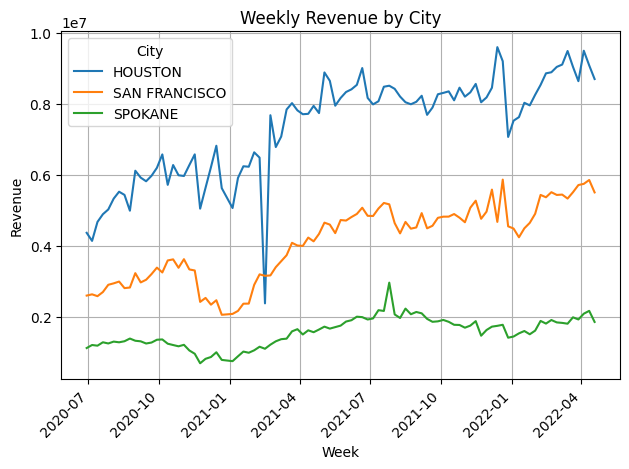

In [29]:
# Group and plot revenue by week and city
revenue_by_city = df.groupby(['week', 'city'])['revenue'].sum().unstack()

plt.figure(figsize=(12, 6))
revenue_by_city.plot()
plt.title('Weekly Revenue by City')
plt.ylabel('Revenue')
plt.xlabel('Week')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title='City')
plt.show()

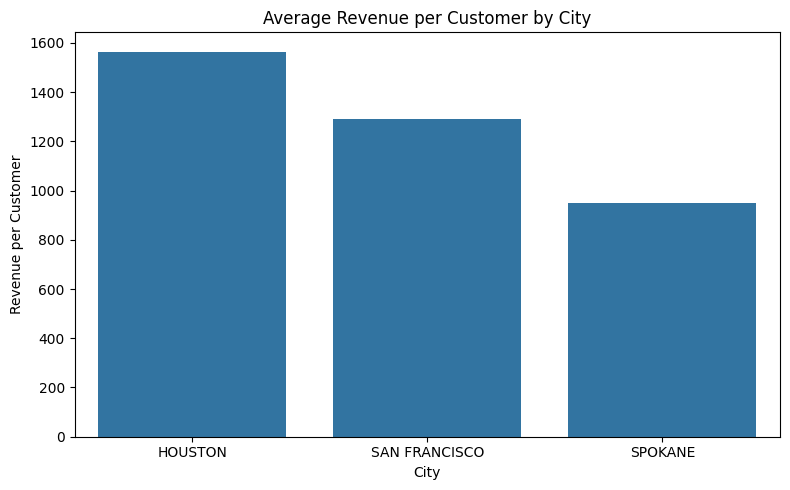

In [30]:
# Create column if not already created
df['revenue_per_customer'] = df['revenue'] / df['customer_count']

# Bar plot of average revenue per customer by city
avg_rev_per_customer = df.groupby('city')['revenue_per_customer'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_rev_per_customer.index, y=avg_rev_per_customer.values)
plt.title('Average Revenue per Customer by City')
plt.ylabel('Revenue per Customer')
plt.xlabel('City')
plt.tight_layout()
plt.show()

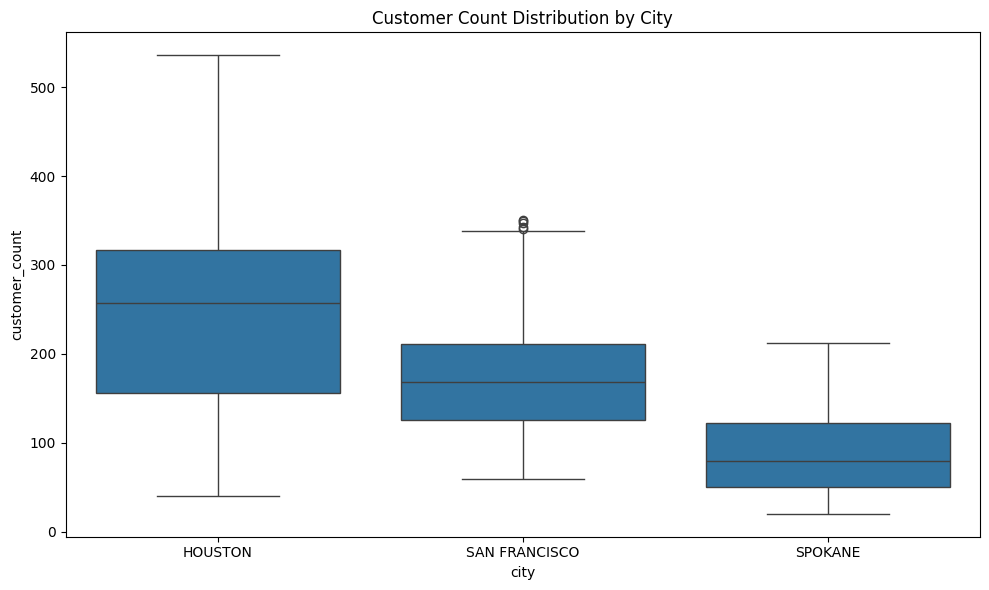

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='city', y='customer_count')
plt.title('Customer Count Distribution by City')
plt.tight_layout()
plt.show()

In [32]:
from scipy.stats import f_oneway

#Grouping revenue_per_customer by city
groups = [group['revenue_per_customer'].values for name, group in df.groupby('city')]

# One-way ANOVA test
f_stat, p_value = f_oneway(*groups)

print(f"F-statistic: {f_stat:.4f}, p-value: {p_value:.4f}")

F-statistic: 183.8074, p-value: 0.0000


Means the average revenue per customer is statistically significant between cities.

In [33]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df['revenue_per_customer'],
                          groups=df['city'],
                          alpha=0.05)

print(tukey.summary())

         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
    group1        group2     meandiff p-adj   lower     upper   reject
----------------------------------------------------------------------
      HOUSTON SAN FRANCISCO -271.8695   0.0 -347.2814 -196.4576   True
      HOUSTON       SPOKANE -615.3365   0.0 -690.7484 -539.9246   True
SAN FRANCISCO       SPOKANE -343.4669   0.0 -418.8788 -268.0551   True
----------------------------------------------------------------------


In terms of Revenue per Customer, Houston < SF < Spokane


In [34]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Features to compare across cities
features_to_test = ['revenue_per_customer', 'cost', 'customer_count', 'cases']

# Store results
anova_results = {}
tukey_results = {}

for feature in features_to_test:
    # Group values by city
    groups = [group[feature].values for name, group in df.groupby('city')]
    
    # Run one-way ANOVA
    f_stat, p_val = f_oneway(*groups)
    anova_results[feature] = {'F-statistic': f_stat, 'p-value': p_val}
    
    # Run Tukey HSD for post-hoc pairwise testing
    tukey = pairwise_tukeyhsd(endog=df[feature], groups=df['city'], alpha=0.05)
    tukey_results[feature] = tukey.summary()

# View ANOVA results
for feature, result in anova_results.items():
    print(f"\n=== {feature.upper()} ===")
    print(f"F-statistic: {result['F-statistic']:.4f}, p-value: {result['p-value']:.4e}")
    if result['p-value'] < 0.05:
        print("=> Statistically significant difference across cities.")
    else:
        print("=> No significant difference across cities.")

# Optional: View a specific Tukey result
print("\n\nTukey HSD for COST:")
print(tukey_results['cost'])


=== REVENUE_PER_CUSTOMER ===
F-statistic: 183.8074, p-value: 1.8233e-77
=> Statistically significant difference across cities.

=== COST ===
F-statistic: 608.6245, p-value: 1.0127e-234
=> Statistically significant difference across cities.

=== CUSTOMER_COUNT ===
F-statistic: 1462.9162, p-value: 0.0000e+00
=> Statistically significant difference across cities.

=== CASES ===
F-statistic: 698.7492, p-value: 4.5731e-265
=> Statistically significant difference across cities.


Tukey HSD for COST:
              Multiple Comparison of Means - Tukey HSD, FWER=0.05              
    group1        group2      meandiff   p-adj    lower        upper     reject
-------------------------------------------------------------------------------
      HOUSTON SAN FRANCISCO   -179589.19   0.0 -200640.4996 -158537.8803   True
      HOUSTON       SPOKANE -312091.1759   0.0 -333142.4855 -291039.8662   True
SAN FRANCISCO       SPOKANE -132501.9859   0.0 -153553.2956 -111450.6762   True
--------------------

Would like to analyze/model by city- lots of variance between these features

Going to run some tests to examine seasonality between features and cities using loops


===== HOUSTON =====


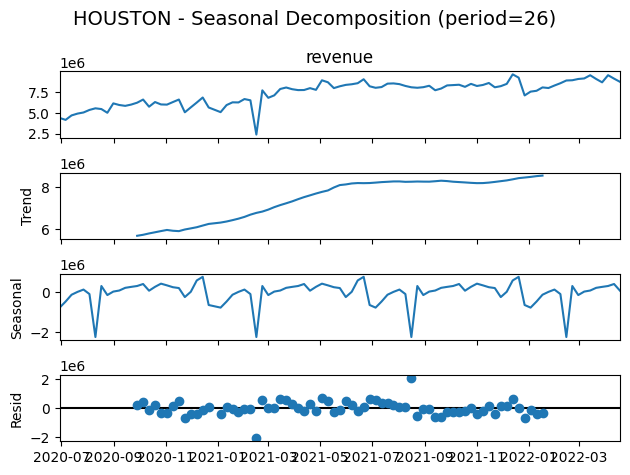

ADF Statistic: -1.8543
p-value: 0.3539
=> Likely Non-Stationary (fail to reject H₀)

===== SAN FRANCISCO =====


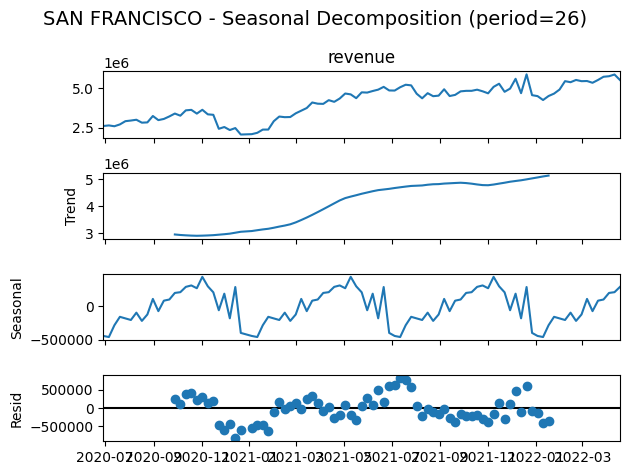

ADF Statistic: -0.9968
p-value: 0.7544
=> Likely Non-Stationary (fail to reject H₀)

===== SPOKANE =====


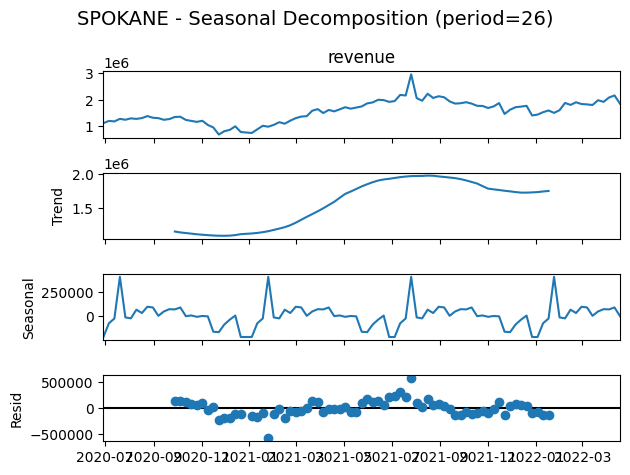

ADF Statistic: -1.1980
p-value: 0.6744
=> Likely Non-Stationary (fail to reject H₀)


In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

cities = df['city'].unique()

for city in cities:
    print(f"\n===== {city.upper()} =====")
    
    # Group revenue by week for this city
    ts = df[df['city'] == city].groupby('week')['revenue'].sum()
    
    # Decomposition
    if len(ts) >= 52:  # only decompose if enough data exists
        decomposition = seasonal_decompose(ts, model='additive', period=26)
        decomposition.plot()
        plt.suptitle(f'{city} - Seasonal Decomposition (period=26)', fontsize=14)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Not enough data to decompose for {city}. Needs >=52 weeks.")
    
    # ADF Test
    result = adfuller(ts)
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    if result[1] < 0.05:
        print("=> Likely Stationary (reject H₀)")
    else:
        print("=> Likely Non-Stationary (fail to reject H₀)")


===== HOUSTON | REVENUE =====


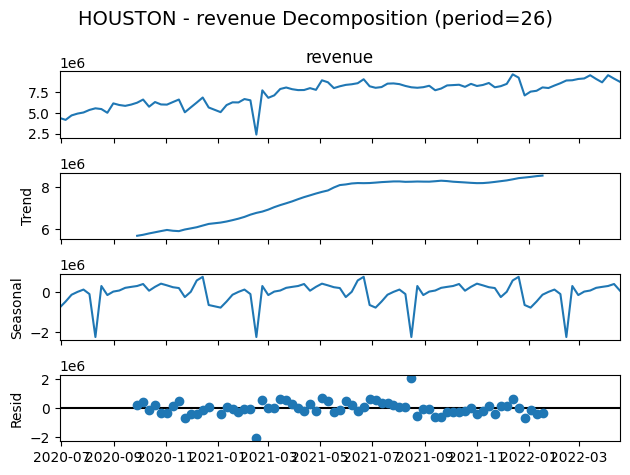

ADF Statistic: -1.8543
p-value: 0.3539
=> Likely Non-Stationary (fail to reject H₀)

===== HOUSTON | COST =====


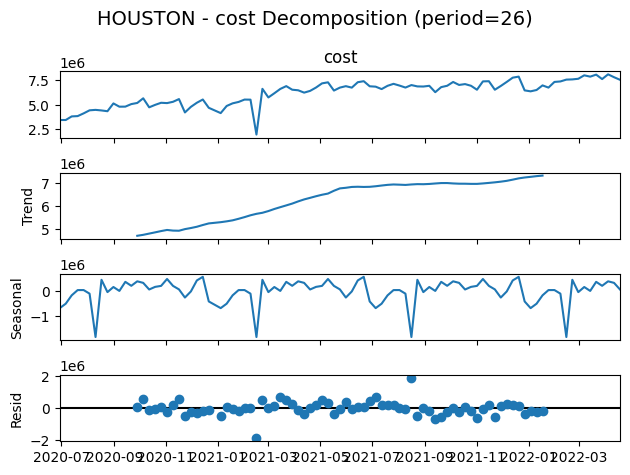

ADF Statistic: -1.5230
p-value: 0.5221
=> Likely Non-Stationary (fail to reject H₀)

===== HOUSTON | CASES =====


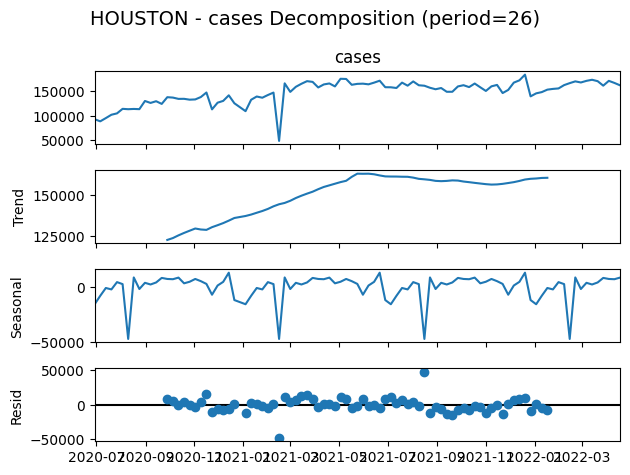

ADF Statistic: -2.9131
p-value: 0.0438
=> Likely Stationary (reject H₀)

===== SAN FRANCISCO | REVENUE =====


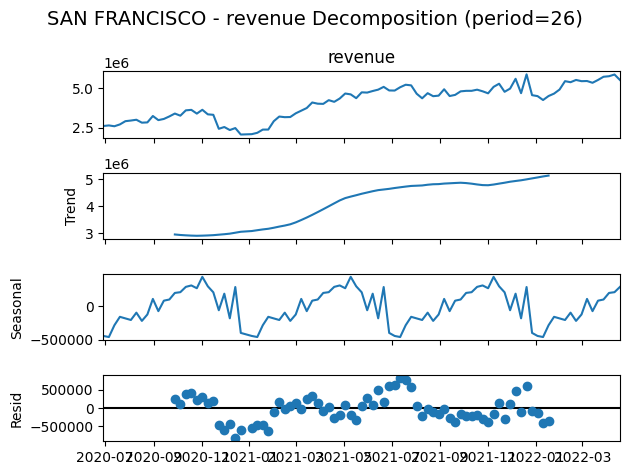

ADF Statistic: -0.9968
p-value: 0.7544
=> Likely Non-Stationary (fail to reject H₀)

===== SAN FRANCISCO | COST =====


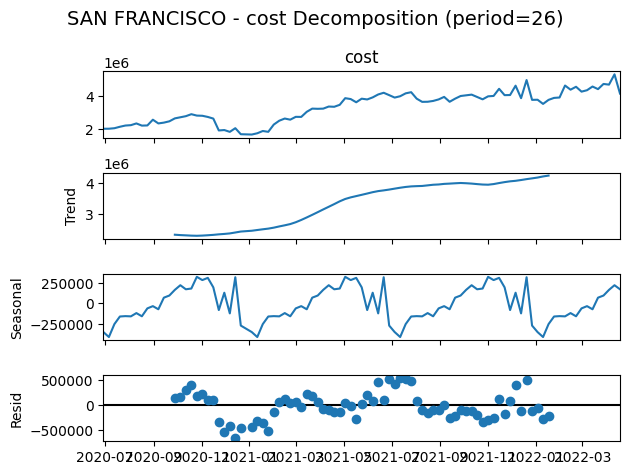

ADF Statistic: -1.0829
p-value: 0.7218
=> Likely Non-Stationary (fail to reject H₀)

===== SAN FRANCISCO | CASES =====


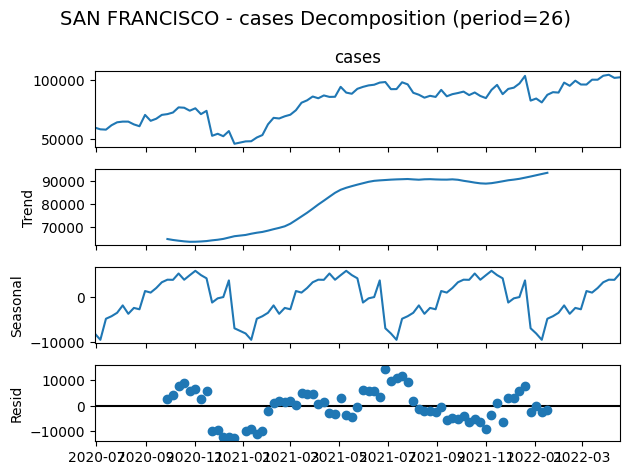

ADF Statistic: -1.2991
p-value: 0.6296
=> Likely Non-Stationary (fail to reject H₀)

===== SPOKANE | REVENUE =====


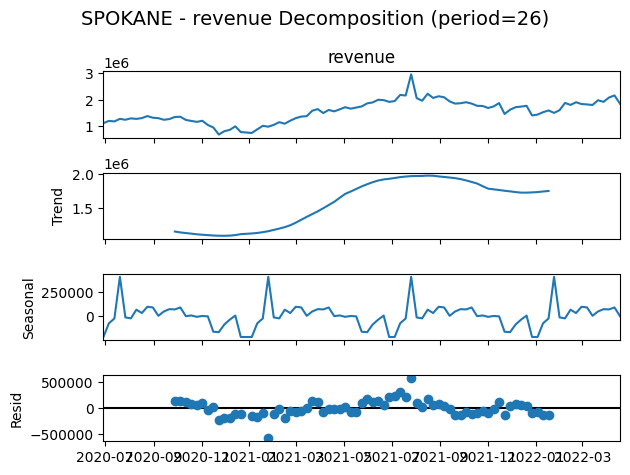

ADF Statistic: -1.1980
p-value: 0.6744
=> Likely Non-Stationary (fail to reject H₀)

===== SPOKANE | COST =====


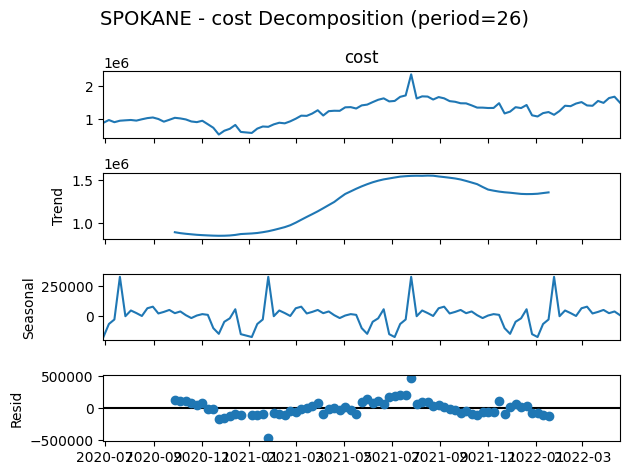

ADF Statistic: -1.3774
p-value: 0.5930
=> Likely Non-Stationary (fail to reject H₀)

===== SPOKANE | CASES =====


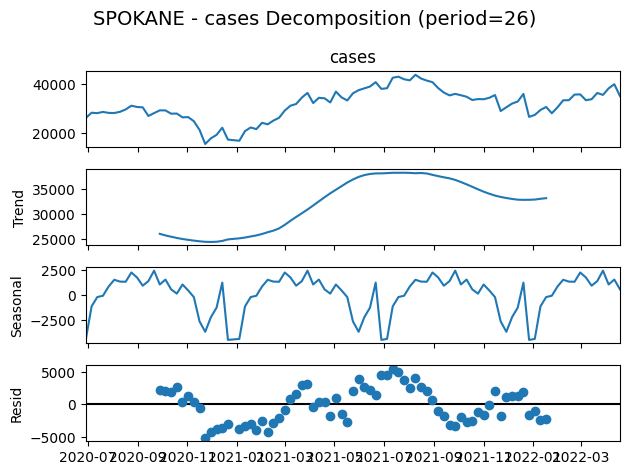

ADF Statistic: -1.8556
p-value: 0.3532
=> Likely Non-Stationary (fail to reject H₀)


In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

cities = df['city'].unique()
metrics = ['revenue', 'cost', 'cases']

for city in cities:
    for metric in metrics:
        print(f"\n===== {city.upper()} | {metric.upper()} =====")

        # Create time series for city-metric combo
        ts = df[df['city'] == city].groupby('week')[metric].sum()

        # Only decompose if enough data
        if len(ts) >= 52:
            try:
                decomposition = seasonal_decompose(ts, model='additive', period=26)
                decomposition.plot()
                plt.suptitle(f'{city} - {metric} Decomposition (period=26)', fontsize=14)
                plt.tight_layout()
                plt.show()
            except Exception as e:
                print(f"Could not decompose {metric} for {city}: {e}")
        else:
            print(f"Not enough data to decompose {metric} for {city}. Needs >= 52 observations.")

        # ADF test for stationarity
        result = adfuller(ts)
        print(f"ADF Statistic: {result[0]:.4f}")
        print(f"p-value: {result[1]:.4f}")
        if result[1] < 0.05:
            print("=> Likely Stationary (reject H₀)")
        else:
            print("=> Likely Non-Stationary (fail to reject H₀)")

Now going to examine seasonality by REVENUE

/var/folders/nw/mcdx_nmx0dqc6zctxr73htkr0000gn/T/ipykernel_10430/2537654448.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=city_df, x='season', y='revenue', estimator='mean', ci=None, order=['Winter', 'Spring', 'Summer', 'Fall'])


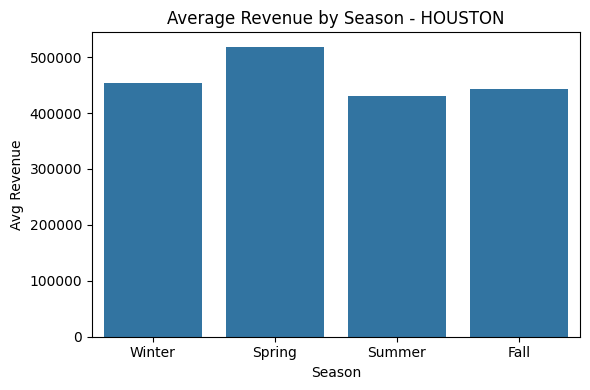

/var/folders/nw/mcdx_nmx0dqc6zctxr73htkr0000gn/T/ipykernel_10430/2537654448.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=city_df, x='season', y='revenue', estimator='mean', ci=None, order=['Winter', 'Spring', 'Summer', 'Fall'])


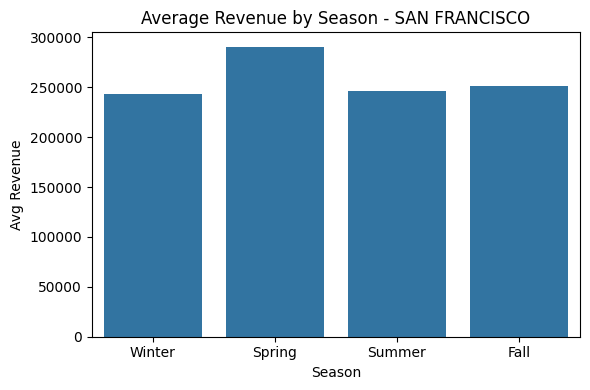

/var/folders/nw/mcdx_nmx0dqc6zctxr73htkr0000gn/T/ipykernel_10430/2537654448.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=city_df, x='season', y='revenue', estimator='mean', ci=None, order=['Winter', 'Spring', 'Summer', 'Fall'])


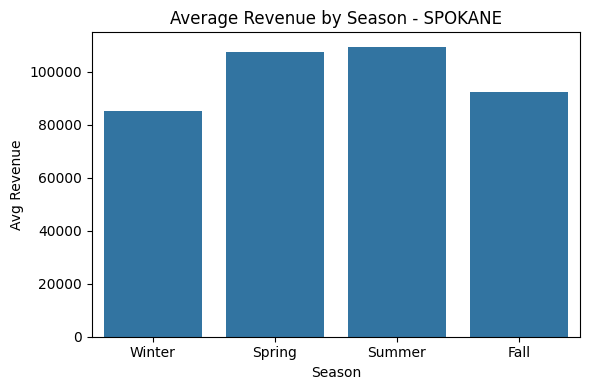

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

cities = df['city'].unique()

for city in cities:
    plt.figure(figsize=(6, 4))
    
    # Filter for this city
    city_df = df[df['city'] == city]
    
    # Plot average revenue by season
    sns.barplot(data=city_df, x='season', y='revenue', estimator='mean', ci=None, order=['Winter', 'Spring', 'Summer', 'Fall'])
    
    plt.title(f'Average Revenue by Season - {city}')
    plt.ylabel('Avg Revenue')
    plt.xlabel('Season')
    plt.tight_layout()
    plt.show()

/var/folders/nw/mcdx_nmx0dqc6zctxr73htkr0000gn/T/ipykernel_10430/711258404.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


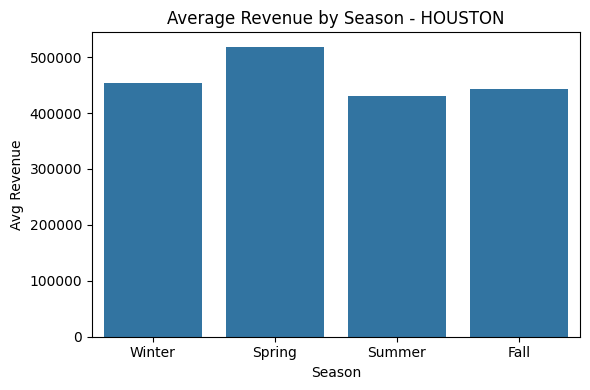

/var/folders/nw/mcdx_nmx0dqc6zctxr73htkr0000gn/T/ipykernel_10430/711258404.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


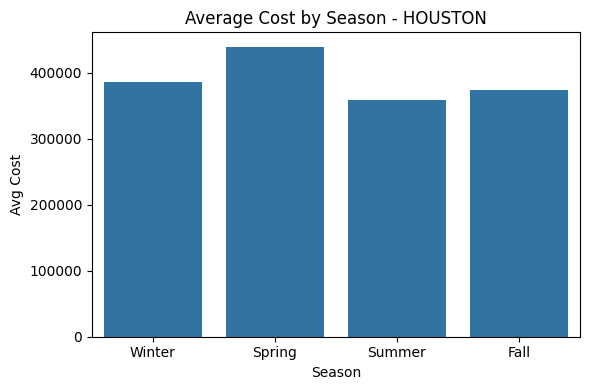

/var/folders/nw/mcdx_nmx0dqc6zctxr73htkr0000gn/T/ipykernel_10430/711258404.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


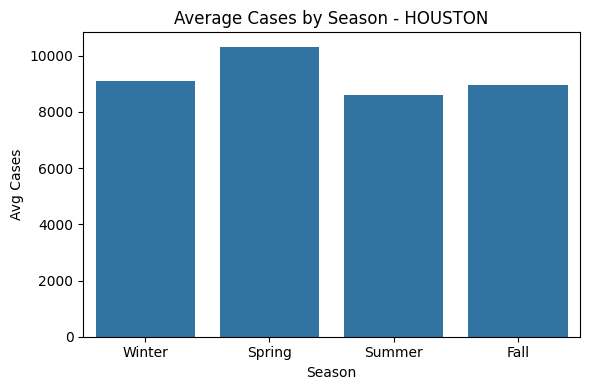

/var/folders/nw/mcdx_nmx0dqc6zctxr73htkr0000gn/T/ipykernel_10430/711258404.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


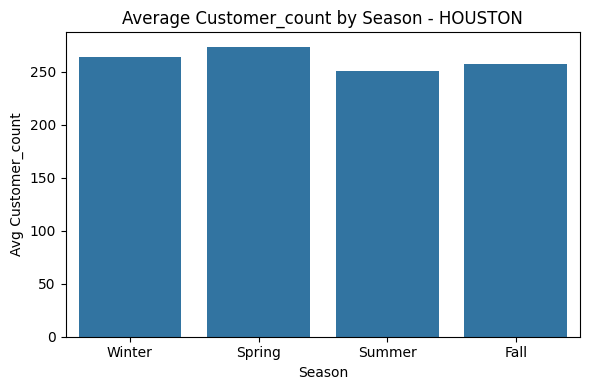

/var/folders/nw/mcdx_nmx0dqc6zctxr73htkr0000gn/T/ipykernel_10430/711258404.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


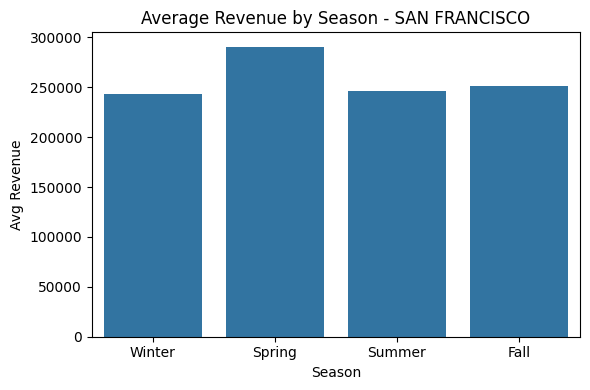

/var/folders/nw/mcdx_nmx0dqc6zctxr73htkr0000gn/T/ipykernel_10430/711258404.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


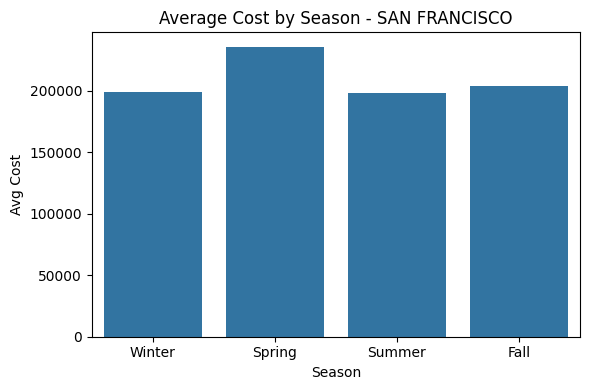

/var/folders/nw/mcdx_nmx0dqc6zctxr73htkr0000gn/T/ipykernel_10430/711258404.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


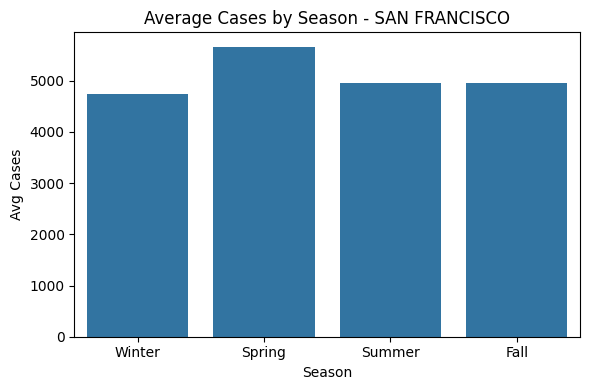

/var/folders/nw/mcdx_nmx0dqc6zctxr73htkr0000gn/T/ipykernel_10430/711258404.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


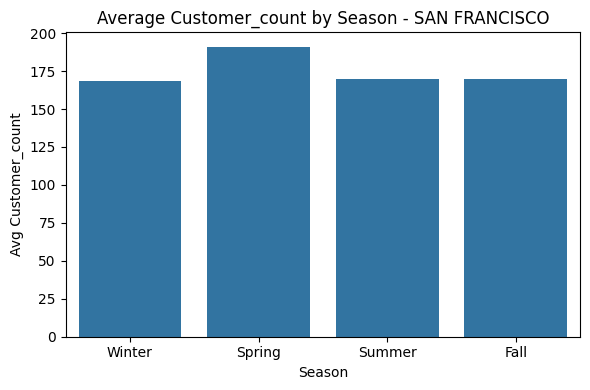

/var/folders/nw/mcdx_nmx0dqc6zctxr73htkr0000gn/T/ipykernel_10430/711258404.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


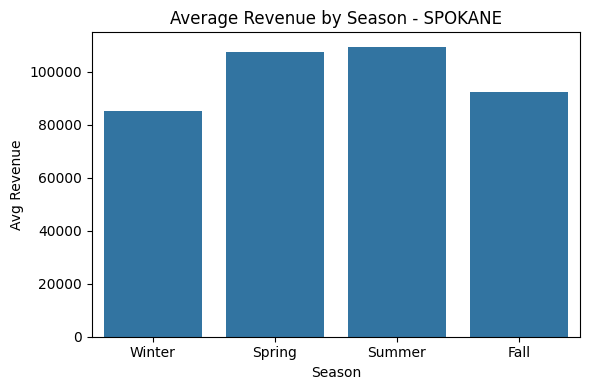

/var/folders/nw/mcdx_nmx0dqc6zctxr73htkr0000gn/T/ipykernel_10430/711258404.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


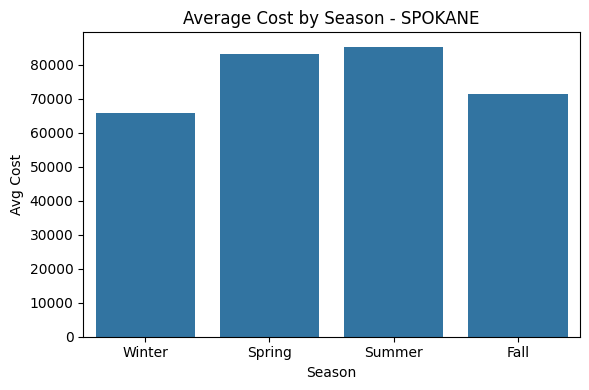

/var/folders/nw/mcdx_nmx0dqc6zctxr73htkr0000gn/T/ipykernel_10430/711258404.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


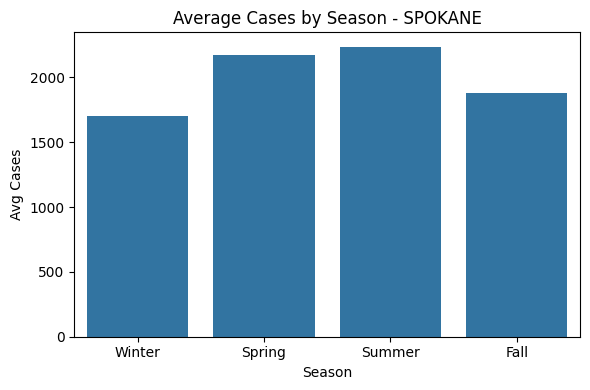

/var/folders/nw/mcdx_nmx0dqc6zctxr73htkr0000gn/T/ipykernel_10430/711258404.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


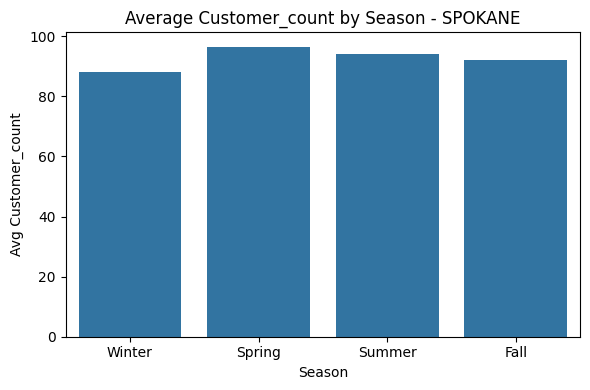

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

cities = df['city'].unique()
metrics = ['revenue', 'cost', 'cases', 'customer_count']  # replace 'cuisine' with numeric column

for city in cities:
    city_df = df[df['city'] == city]

    for metric in metrics:
        plt.figure(figsize=(6, 4))

        sns.barplot(
            data=city_df,
            x='season',
            y=metric,
            estimator='mean',
            ci=None,
            order=['Winter', 'Spring', 'Summer', 'Fall']
        )

        plt.title(f'Average {metric.capitalize()} by Season - {city}')
        plt.ylabel(f'Avg {metric.capitalize()}')
        plt.xlabel('Season')
        plt.tight_layout()
        plt.show()

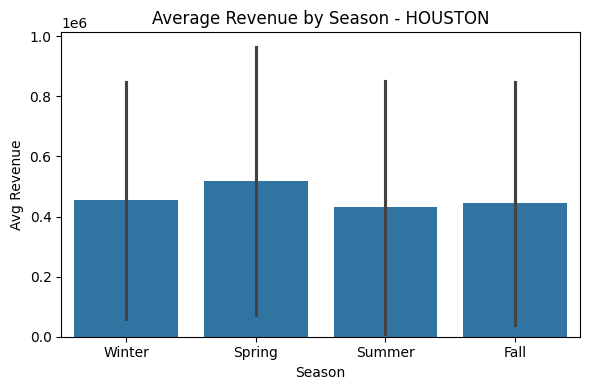

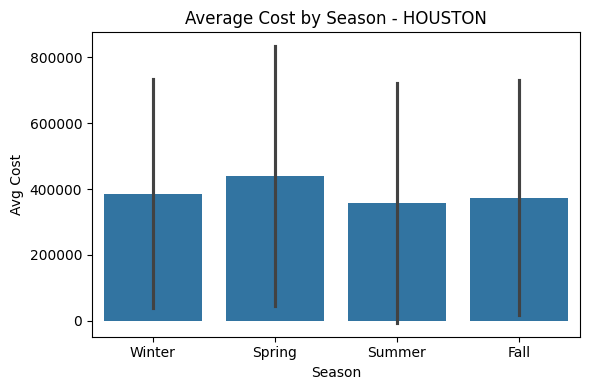

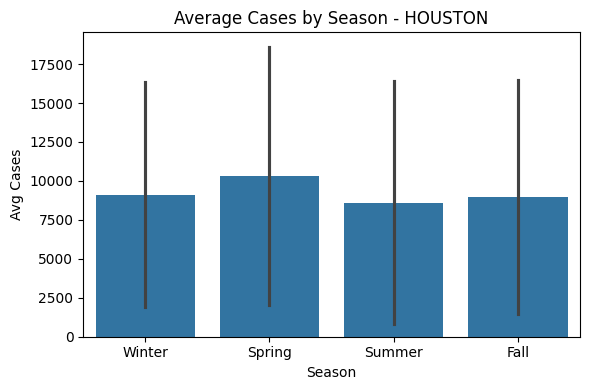

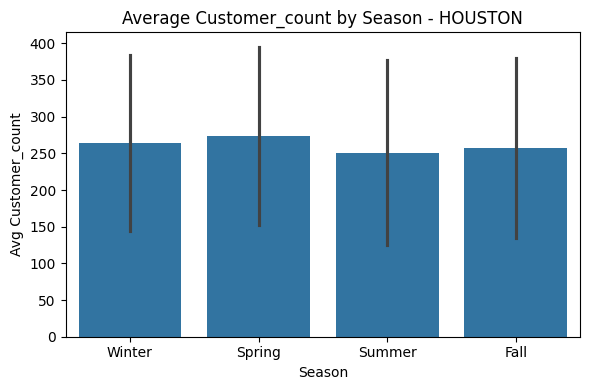

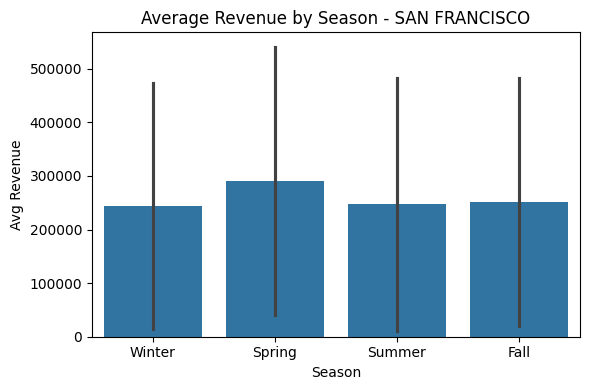

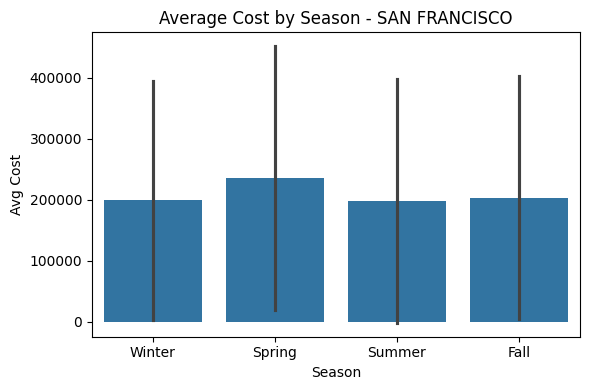

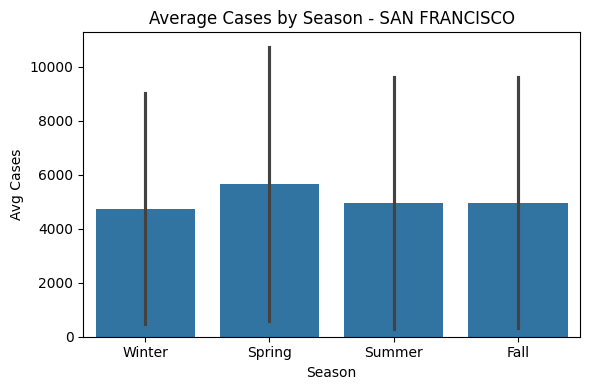

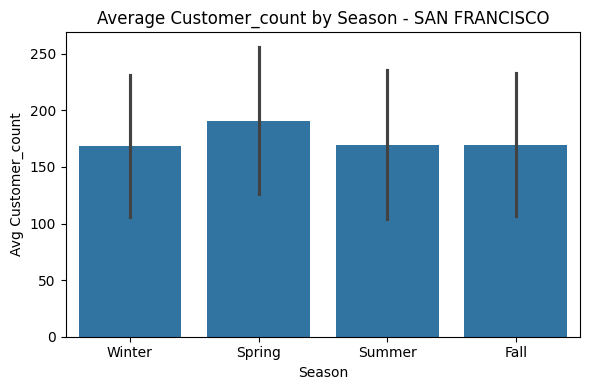

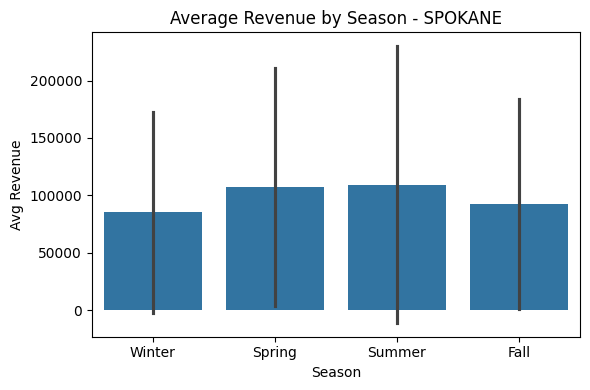

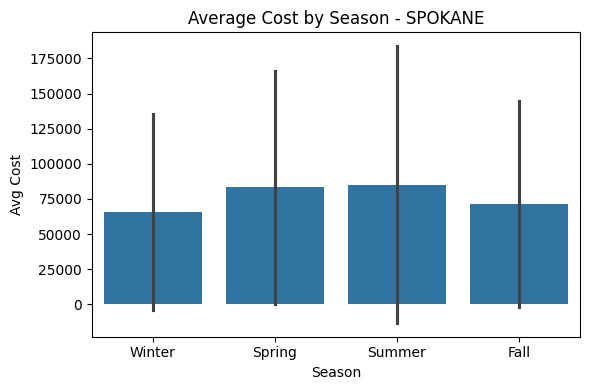

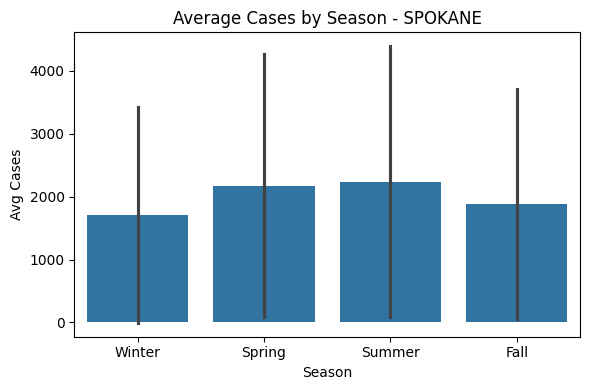

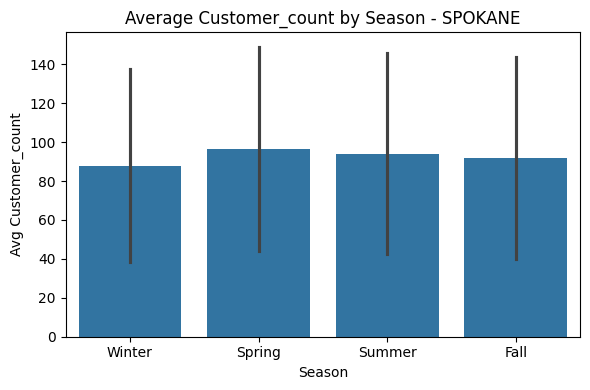

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

cities = df['city'].unique()
metrics = ['revenue', 'cost', 'cases', 'customer_count']

for city in cities:
    city_df = df[df['city'] == city]

    for metric in metrics:
        plt.figure(figsize=(6, 4))

        sns.barplot(
            data=city_df,
            x='season',
            y=metric,
            estimator='mean',
            errorbar='sd',  # standard deviation
            order=['Winter', 'Spring', 'Summer', 'Fall']
        )

        plt.title(f'Average {metric.capitalize()} by Season - {city}')
        plt.ylabel(f'Avg {metric.capitalize()}')
        plt.xlabel('Season')
        plt.tight_layout()
        plt.show()

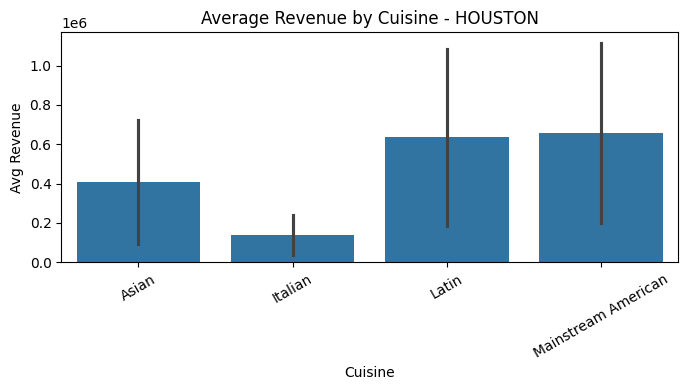

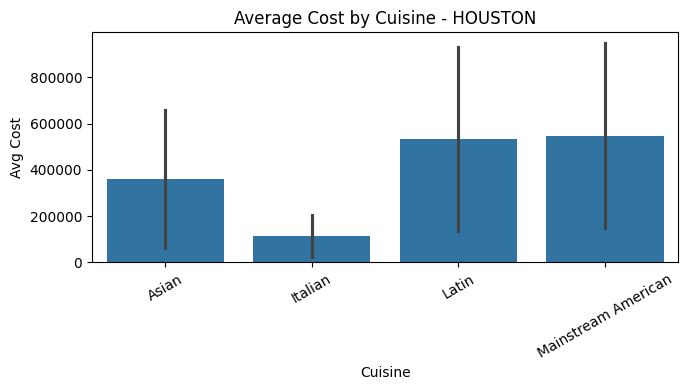

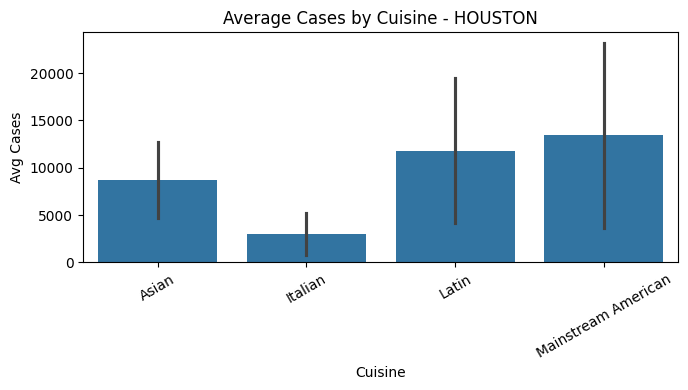

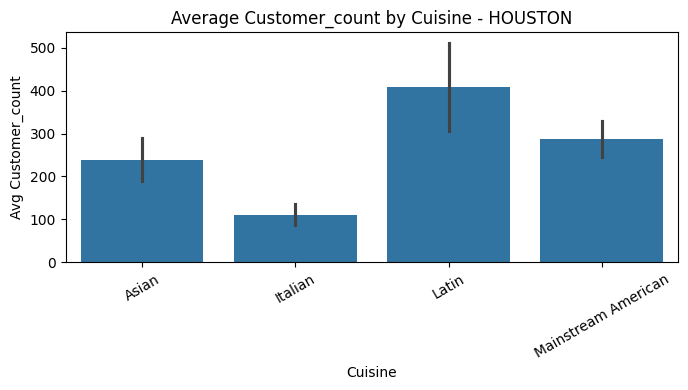

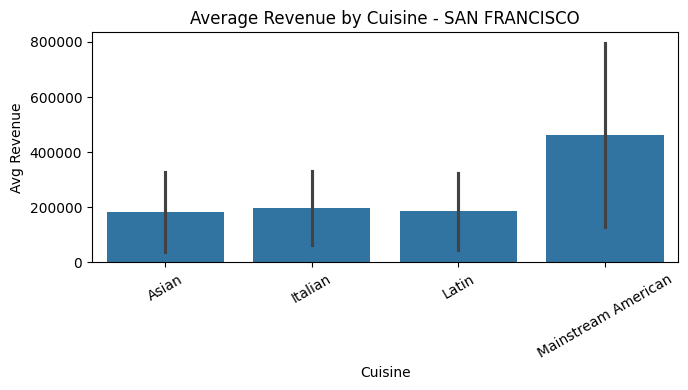

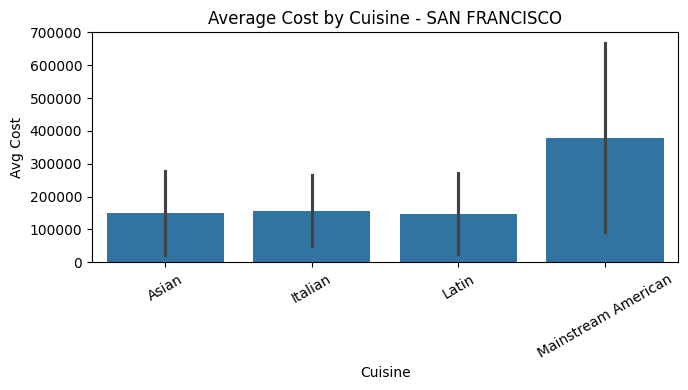

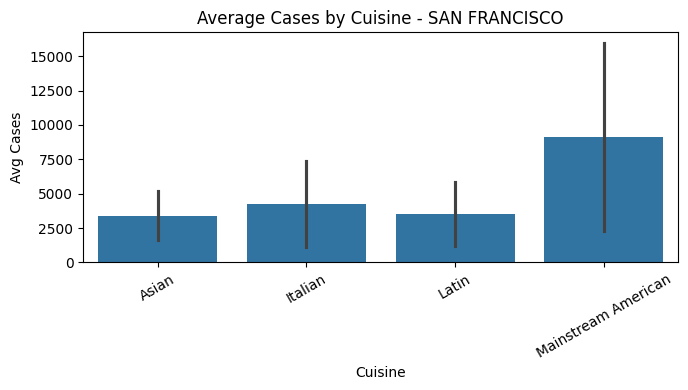

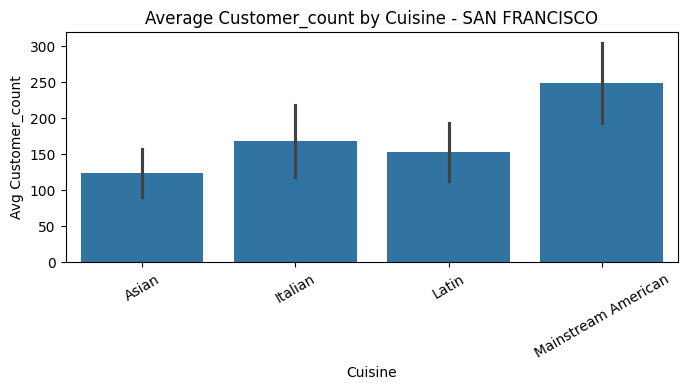

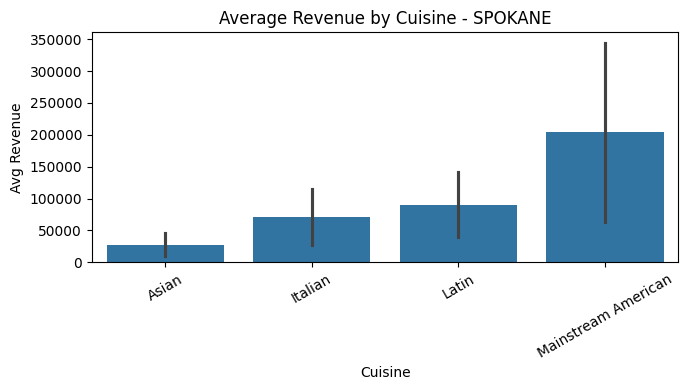

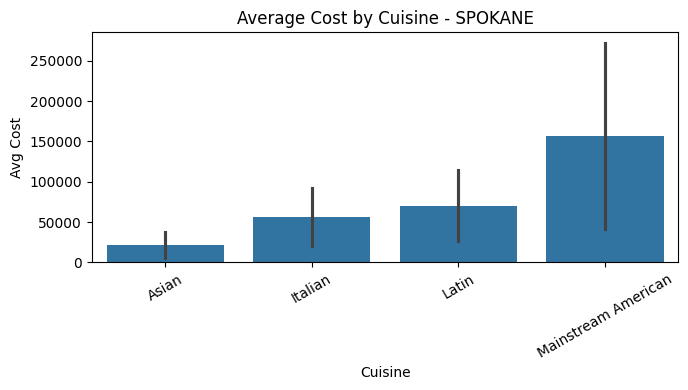

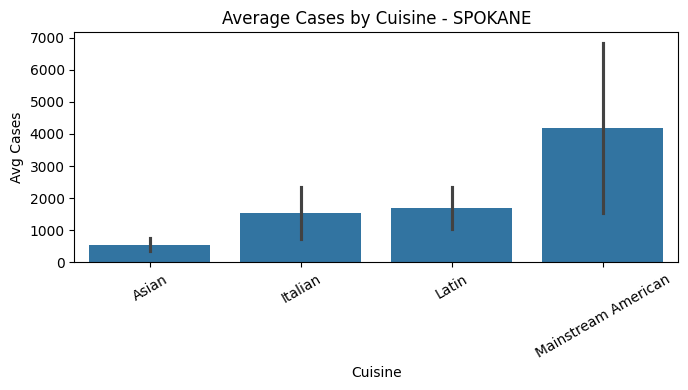

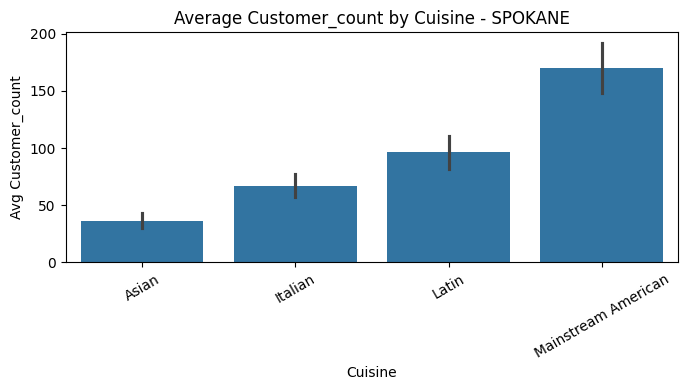

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

cities = df['city'].unique()
metrics = ['revenue', 'cost', 'cases', 'customer_count']

for city in cities:
    city_df = df[df['city'] == city]

    for metric in metrics:
        plt.figure(figsize=(7, 4))

        sns.barplot(
            data=city_df,
            x='cuisine',
            y=metric,
            estimator='mean',
            errorbar='sd',  # show standard deviation
        )

        plt.title(f'Average {metric.capitalize()} by Cuisine - {city}')
        plt.ylabel(f'Avg {metric.capitalize()}')
        plt.xlabel('Cuisine')
        plt.xticks(rotation=30)
        plt.tight_layout()
        plt.show()

Now going to compare seasons to cuisine. Looking for any patterns that jump out or could be helpful

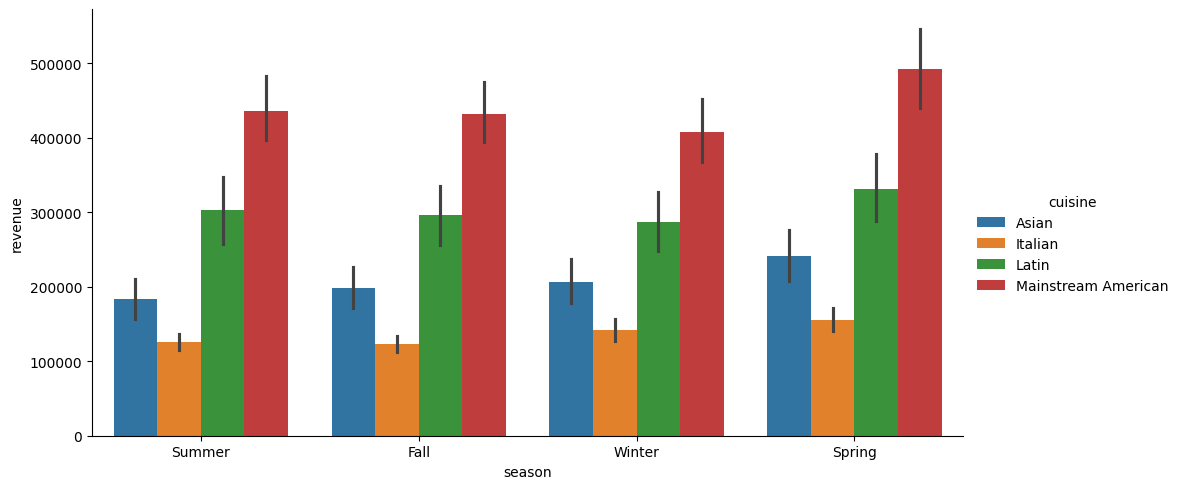

In [41]:
sns.catplot(data=df, x='season', y='revenue', hue='cuisine', kind='bar', height=5, aspect=2)

Let's now look at Revenue by cases

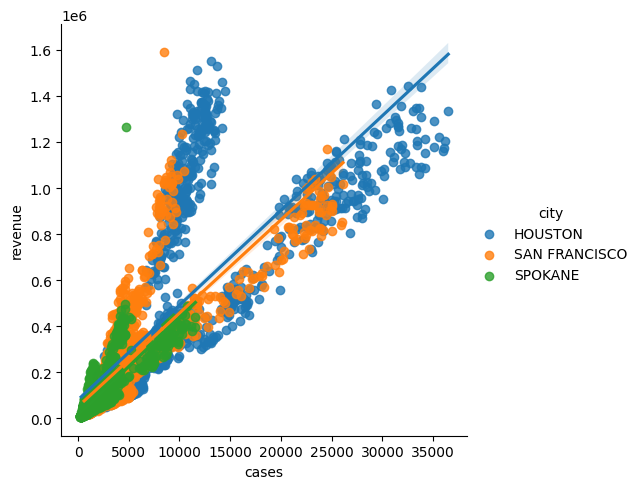

In [42]:
sns.lmplot(data=df, x='cases', y='revenue', hue='city')

Strong correlelation and interesting split. Notice clusters around lower end for Spokane

Looking for gaps/missing data

In [43]:
for city in df['city'].unique():
    weeks = df[df['city'] == city]['week'].sort_values()
    gaps = weeks.diff().dt.days.value_counts()
    print(f"{city}: {gaps}")

HOUSTON: week
0.0     1410
7.0       92
14.0       1
Name: count, dtype: int64
SAN FRANCISCO: week
0.0     1410
7.0       92
14.0       1
Name: count, dtype: int64
SPOKANE: week
0.0     1410
7.0       92
14.0       1
Name: count, dtype: int64


In [44]:
for city in df['city'].unique():
    city_weeks = df[df['city'] == city]['week'].drop_duplicates().sort_values()
    gaps = city_weeks.diff().dt.days.value_counts()
    print(f"{city}:")
    print(gaps)

HOUSTON:
week
7.0     92
14.0     1
Name: count, dtype: int64
SAN FRANCISCO:
week
7.0     92
14.0     1
Name: count, dtype: int64
SPOKANE:
week
7.0     92
14.0     1
Name: count, dtype: int64


In [45]:
# Weekly date range
full_weeks = pd.date_range(start=df['week'].min(), end=df['week'].max(), freq='W-MON')

# Reindex to the full weekly range
filled = []

for city in df['city'].unique():
    city_df = df[df['city'] == city].groupby('week')[['revenue', 'cost', 'cases', 'customer_count']].sum()
    city_df = city_df.reindex(full_weeks)  # insert missing week(s)
    city_df['city'] = city
    filled.append(city_df.reset_index().rename(columns={'index': 'week'}))

df_filled = pd.concat(filled)

In [46]:
# If it's already datetime, no conversion needed
df['week'] = pd.to_datetime(df['week'])  

missing_weeks_per_city = {}

for city in df['city'].unique():
    city_weeks = df[df['city'] == city]['week'].drop_duplicates().sort_values()
    full_range = pd.date_range(start=city_weeks.min(), end=city_weeks.max(), freq='W-MON')
    missing_weeks = full_range.difference(city_weeks)
    missing_weeks_per_city[city] = missing_weeks

# Print 
for city, weeks in missing_weeks_per_city.items():
    print(f"\n{city} is missing {len(weeks)} week(s):")
    for week in weeks:
        print(f"  - {week.date()}")


HOUSTON is missing 1 week(s):
  - 2020-12-28

SAN FRANCISCO is missing 1 week(s):
  - 2020-12-28

SPOKANE is missing 1 week(s):
  - 2020-12-28


Looks like missing a week- due to Holiday

In [47]:
df['week'] = pd.to_datetime(df['week'])

df_filled = []

value_cols = ['revenue', 'cost', 'cases', 'customer_count']

for city in df['city'].unique():
    city_df = df[df['city'] == city].copy()
    
    # Group to ensure one row per week per (cuisine, product_type)
    grouped = city_df.groupby(['week', 'cuisine', 'product_type'], as_index=False)[value_cols].sum()

    for (cuisine, product_type), group in grouped.groupby(['cuisine', 'product_type']):
        # Set index to week and reindex to full weekly range
        group = group.set_index('week').sort_index()
        full_range = pd.date_range(start=group.index.min(), end=group.index.max(), freq='W-MON')
        group = group.reindex(full_range)

        # Add back identifiers
        group['city'] = city
        group['cuisine'] = cuisine
        group['product_type'] = product_type
        group['week'] = group.index

        df_filled.append(group.reset_index(drop=True))

# Combine all filled groups
df_full = pd.concat(df_filled, ignore_index=True)

In [48]:
# Percent of missing values per column
missing_pct = df_full.isna().mean().round(3) * 100
print("Missing data (%):\n", missing_pct)

Missing data (%):
 cuisine           0.0
product_type      0.0
revenue           1.1
cost              1.1
cases             1.1
customer_count    1.1
city              0.0
week              0.0
dtype: float64


In [49]:
# Ensure column is consistent
df_full['city'] = df_full['city'].str.strip().str.upper()

# Create separate DataFrames for each city
df_houston = df_full[df_full['city'] == 'HOUSTON'].copy()
df_sf = df_full[df_full['city'] == 'SAN FRANCISCO'].copy()
df_spokane = df_full[df_full['city'] == 'SPOKANE'].copy()

Now we are going to impute the missing values, but each city is unique so we split the dataset accordingly first

In [50]:
from sklearn.impute import KNNImputer

# Define numerical columns to impute
num_cols = ['revenue', 'cost', 'cases', 'customer_count']

# Function to impute one city’s DataFrame
def knn_impute_city(df_city, n_neighbors=3):
    imputer = KNNImputer(n_neighbors=n_neighbors)
    df_city[num_cols] = imputer.fit_transform(df_city[num_cols])
    return df_city

# Apply to each city
df_houston = knn_impute_city(df_houston)
df_sf = knn_impute_city(df_sf)
df_spokane = knn_impute_city(df_spokane)

In [51]:
# List of city DataFrames
city_dfs = {
    "HOUSTON": df_houston,
    "SAN FRANCISCO": df_sf,
    "SPOKANE": df_spokane
}

# Check for any missing values in each
for city, df in city_dfs.items():
    missing_count = df.isnull().sum().sum()
    if missing_count == 0:
        print(f"{city}: No missing values.")
    else:
        print(f"{city}: ❌ {missing_count} missing values found!")

HOUSTON: No missing values.
SAN FRANCISCO: No missing values.
SPOKANE: No missing values.


Lastly, a heatmap for features

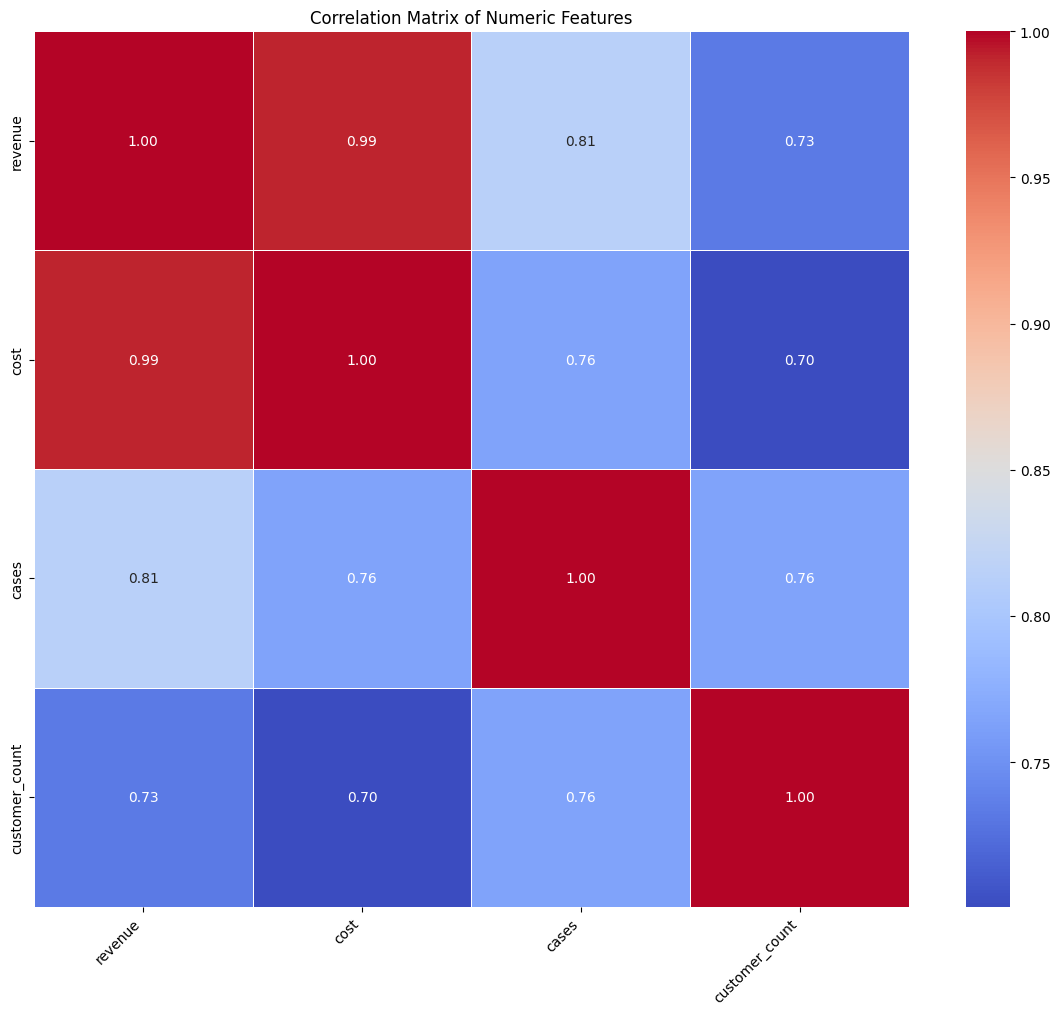

In [ ]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(corr, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            linewidths=0.5, 
            square=True)

plt.title('Correlation Matrix of Numeric Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Now going to save each city as a separate df to use in other files separately

In [52]:
df_houston.to_pickle("houston_df.pkl")
df_sf.to_pickle("san_francisco_df.pkl")
df_spokane.to_pickle("spokane_df.pkl")